In [32]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# print(os.path.exists('Down_Tratamentos/2019.csv'))


dw2019 = pd.read_csv('Down_Tratamentos/2019_tratado.csv') #colunas 22 
dw2020 = pd.read_csv('Down_Tratamentos/2020_tratado.csv') #colunas 22
dw2021 = pd.read_csv('Down_Tratamentos/2021_tratado.csv') #colunas 22
dw2022 = pd.read_csv('Down_Tratamentos/2022_tratado.csv') #colunas 35
df_aeroportos = pd.read_csv('aeropuertos_2020.csv')

colunas_2020 = len(dw2020.columns)
colunas_2022 = len(dw2022.columns)
colunas_2021 = len(dw2021.columns)
print(f"tabelas: 2019 -{len(dw2019.columns)}; 2020 - {len(dw2020.columns)}; 2021 - {len(dw2021.columns)}; 2022 - {len(dw2022.columns)} = colunas")
dw2019.columns
df_aeroportos.columns
df_bsb = df_aeroportos[df_aeroportos['gcd_iata'] == 'BSB']
df_bsb

tabelas: 2019 -22; 2020 - 22; 2021 - 22; 2022 - 35 = colunas


,geocode,etiqueta,granularidad,gcd_iata,gcd_icao,longitud,latitud,geohash
103,BR_SBBR,Aeropuerto Internacional Presidente Juscelino ...,AEROPUERTOS,BSB,SBBR,-47.920834,-15.869167,6vjvtx157s


### DataFrame 2019

In [3]:
def_senadores2019 = pd.DataFrame({
    "Passageiro": dw2019["Passageiro"],
    "Partido": dw2019["Partido"],
    "Sexo": dw2019["Sexo"],
    "UF": dw2019["UF"],
    "Motivo": dw2019["Motivo"],
    "ResumoMotivo": dw2019["Resumo do Motivo"],
    "Cargo": dw2019["Status do Passageiro"],
    "TipoServico": dw2019["Tipo de Servi�o"],
    "Trechos": dw2019["Trechos"],
    "Data1": dw2019["Data da Viagem"],
    "Data2": dw2019["Unnamed: 7"],
    "Tarifa": dw2019["Tarifa"],
    "Classe": dw2019["Classe"],
    "MultaOuRemarcacao": dw2019["Multa/Remarca��o"],
    "Cancelamento": dw2019["Data do Cancelamento/ Remarca��o"],
    "CustoTotal": dw2019["Custo Efetivo SF"]

})
# Valor Reembolso
def_senadores2019
print(len(def_senadores2019.columns))

16


### DataFrame 2020

In [4]:
df_senadaores2020 = pd.DataFrame({
    "Passageiro": dw2020["Passageiro"],
    "Partido": dw2020["Partido"],
    "Sexo": dw2020["Sexo"],
    "UF": dw2020["UF"],
    "Motivo": dw2022["Motivo"],
    "ResumoMovito": dw2022["Passageiro"],
    "Cargo": dw2022["Status do Passageiro"],
    "TipoServico": dw2022["Tipo de Servi�o"],
    "Trechos": dw2022["Trechos"],
    "Data1": dw2022["Data da Viagem"],
    "Data2": dw2022["Unnamed: 7"],
    "Tarifa": dw2022["Unnamed: 9"],
    "Classe": dw2020["GRU / UPGRADE de Classe"],
    "Reembolso": dw2022["Valor do Reembolso"],
    "MultaOuRemarcacao": dw2020["Multa/Remarca��o"],
    "CustoTotal": dw2022["Unnamed: 30"]
})
len(df_senadaores2020.columns)

16

### DataFrame 2021

In [5]:
df_senadores2021 = pd.DataFrame({
    "Passageiro": dw2021["Passageiro"],
    "Partido": dw2021["Partido"],
    "Sexo": dw2021["Sexo"],
    "UF": dw2021["UF"],
    "Motivo": dw2021["Motivo"],
    "ResumoMovito": dw2021["Passageiro"],
    "Cargo": dw2021["Status do Passageiro"],
    "TipoServico": dw2021["Tipo de Servi�o"],
    "Trechos": dw2021["Trechos"],
    "Data1": dw2021["Data da Viagem"],
    "Data2": dw2021["Unnamed: 7"],
    "TxEmbarque": dw2021["Tx.de Embarque"],
    "Classe": dw2021["GRU / UPGRADE de Classe"],
    "Reembolso": dw2021["Valor do Reembolso"],
    "MultaOuRemarcacao": dw2021["Multa/Remarca��o"],
    "CustoTotal": dw2021["Custo Efetivo SF"]
})
len(df_senadores2021.columns)


16

### DataFrame 2022

In [6]:
df_senadores2022 = pd.DataFrame({
    "Passageiro": dw2022["Passageiro"],
    "Partido": dw2022["Partido"],
    "Sexo": dw2022["Sexo"],
    "UF": dw2022["UF"],
    "Motivo": dw2022["Motivo"],
    "ResumoMotivo": dw2022["Resumo do Motivo"],
    "Cargo": dw2022["Status do Passageiro"],
    "TipoServico": dw2022["Tipo de Servi�o"],
    "Trechos": dw2022["Trechos"],
    "Data1": dw2022["Data da Viagem"],
    "Data2": dw2022["Unnamed: 7"],
    "Tarifa": dw2022["Unnamed: 9"],
    "Cancelamento": dw2022["Data do Cancelamento/ Remarca��o"],
    "Classe": dw2022["Classe"],
    "Reembolso": dw2022["Valor do Reembolso"],
    "CustoTotal": dw2022["Unnamed: 30"]

})
# Valor Reembolso
len(df_senadores2022.columns)

16

## Contenando as tabelas

In [7]:
df_senadores = pd.concat([def_senadores2019, df_senadaores2020, df_senadores2021, df_senadaores2020])
# df_senadores.to_csv("todos_dados.csv")

In [24]:
df_todos_senadores = pd.read_csv("todos_dados.csv")
df_todos_senadores.columns

Index(['Unnamed: 0', 'Passageiro', 'Partido', 'Sexo', 'UF', 'Motivo',
       'ResumoMotivo', 'Cargo', 'TipoServico', 'Trechos', 'Data1', 'Data2',
       'Tarifa', 'Classe', 'MultaOuRemarcacao', 'Cancelamento', 'CustoTotal',
       'ResumoMovito', 'Reembolso', 'TxEmbarque'],
      dtype='object')

In [ ]:

data_senadores_todos = pd.DataFrame({
    "Passageiro": df_todos_senadores["Passageiro"],
    "Partido": df_todos_senadores["Partido"],
    "Sexo": df_todos_senadores["Sexo"],
    "UF": df_todos_senadores["UF"],
    "Trecho": df_todos_senadores["Trechos"],
    "Data1": df_todos_senadores["Data1"],
    "Data2": df_todos_senadores["Data2"],
    "Tarifa": df_todos_senadores["Tarifa"],
    "Classe": df_todos_senadores["Classe"],
    "MultaOurRemarcacao": df_todos_senadores["MultaOuRemarcacao"],
    "Cancelamento": df_todos_senadores["Cancelamento"],
    "TxEmbarque":df_todos_senadores["TxEmbarque"],
    "Custo": df_todos_senadores["CustoTotal"]
}
)
df_senadores["CustoTotal"] = data_senadores_todos["Custo"].str.replace(".", "", regex=False)  # Remove pontos
df_senadores["CustoTotal"] = df_senadores["CustoTotal"].str.replace(",", ".", regex=False).astype(float)  # Troca vírgula por ponto
df_senadores["CustoTotal"]

0       3135.45
1        128.00
2      17643.91
3        193.03
4      30512.96
         ...   
112      107.10
113        0.01
114      526.54
115      762.40
116     1558.63
Name: CustoTotal, Length: 441, dtype: float64

In [13]:
scaler = StandardScaler()
df_senadores["GastosNormalizados"] = scaler.fit_transform(df_senadores[["CustoTotal"]])
df_senadores = df_senadores.dropna(subset=["GastosNormalizados"])

## Aplicando KMeans


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
teste = df_senadores.loc[:, "cluster"] = kmeans.fit_predict(df_senadores[["GastosNormalizados"]])
teste


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [36]:
unique, counts = np.unique(df_senadores["TESTE"], return_counts=True)
dict(zip(unique, counts))

{np.int32(0): np.int64(399), np.int32(1): np.int64(42)}

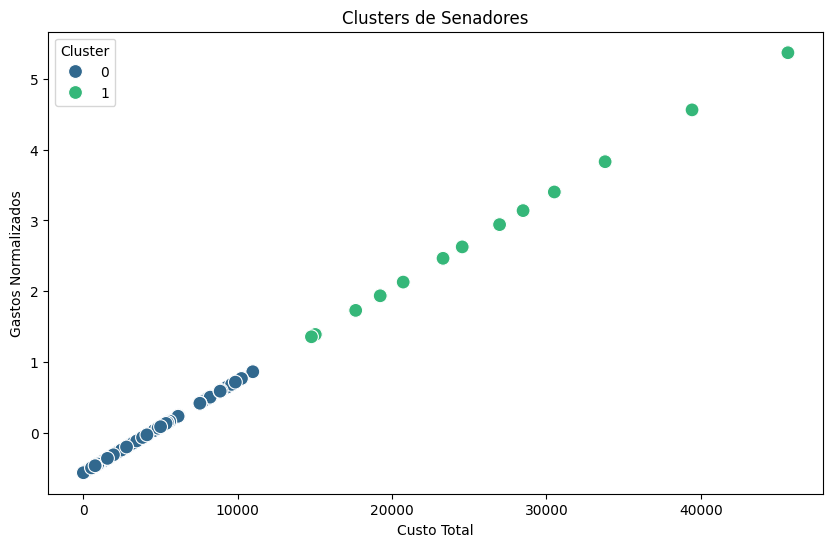

In [37]:
# Aplica o KMeans e adiciona os rótulos de cluster ao DataFrame
kmeans = KMeans(n_clusters=2, random_state=42)
df_senadores['TESTE'] = kmeans.fit_predict(df_senadores[["GastosNormalizados"]])

# Agora, usa o DataFrame com a coluna 'Cluster' no gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_senadores, x="CustoTotal", y="GastosNormalizados", hue="Cluster", palette="viridis", s=100)

# Títulos e rótulos
plt.title("Clusters de Senadores")
plt.xlabel("Custo Total")
plt.ylabel("Gastos Normalizados")
plt.legend(title="Cluster")
plt.show()


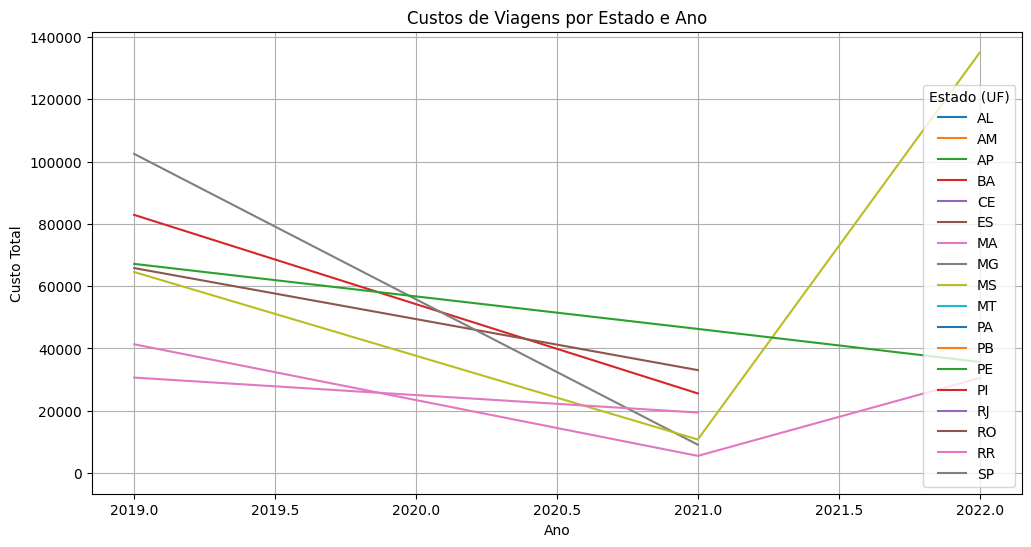

In [26]:


# Supondo que o DataFrame seja df_senadores
df_senadores['Data1'] = pd.to_datetime(df_senadores['Data1'], dayfirst=True)  # Converte para datetime
df_senadores['Ano'] = df_senadores['Data1'].dt.year  # Extrai o ano da Data1

# Agrupar os dados por estado (UF) e ano, somando os custos
df_custos = df_senadores.groupby(['UF', 'Ano'])['CustoTotal'].sum().reset_index()

# Plotar os custos de viagem por estado e ano
plt.figure(figsize=(12, 6))
for uf in df_custos['UF'].unique():
    df_uf = df_custos[df_custos['UF'] == uf]
    plt.plot(df_uf['Ano'], df_uf['CustoTotal'], label=uf)

plt.title("Custos de Viagens por Estado e Ano")
plt.xlabel("Ano")
plt.ylabel("Custo Total")
plt.legend(title="Estado (UF)")
plt.grid(True)
plt.show()

    UF  CustoTotal
8   MS   210598.33
12  PE   154494.94
3   BA   137067.61
7   MG   113946.43
6   MA   100652.88
5   ES    98852.20
16  RR    50052.35
9   MT    48395.07
1   AM    36644.51
0   AL    34654.18
15  RO    33572.02
17  SP    24544.22
14  RJ    17836.94
11  PB    15255.51
13  PI     9778.52
2   AP     9253.60
10  PA     3070.77
4   CE       93.81


/tmp/ipykernel_17091/348936391.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gastos_por_estado, x='UF', y='CustoTotal', palette='viridis')


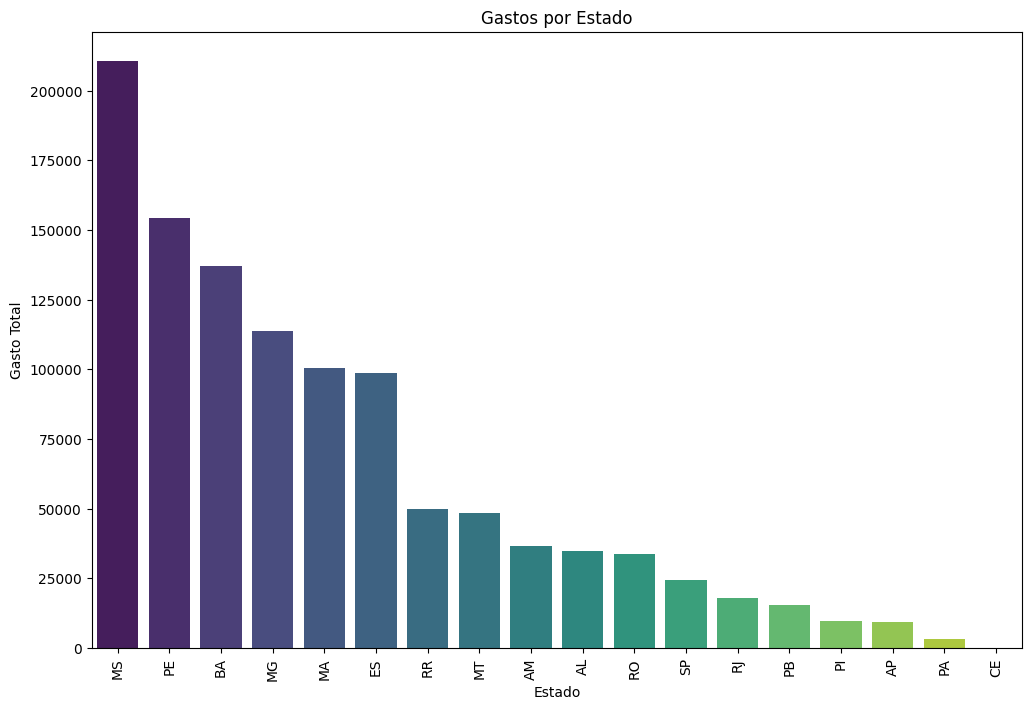

In [38]:

gastos_por_estado = df_senadores.groupby('UF')['CustoTotal'].sum().reset_index()

# Ordenar os estados com maior gasto total
gastos_por_estado = gastos_por_estado.sort_values(by='CustoTotal', ascending=False)

# Exibir os resultados
print(gastos_por_estado)

# (Opcional) Visualizar os gastos por estado em um gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=gastos_por_estado, x='UF', y='CustoTotal', palette='viridis')
plt.title('Gastos por Estado')
plt.xlabel('Estado')
plt.ylabel('Gasto Total')
plt.xticks(rotation=90)  # Girar as labels no eixo X para melhor visualização
plt.show()
